# Lab 03

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from utils.plotting import pretty_draw, draw_graph_with_degree_histogram
from utils.graph_import import read_mtx

%matplotlib inline

## Task 1 - normal

In [2]:
def draw_hist(y):
    plt.hist(y)
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.xticks([np.round(i*st.stdev(y) + st.mean(y),2) for i in range(-2,3)])
    plt.grid(True, axis='x')
    plt.xticks(rotation=45)
    plt.show()

In [3]:
norm_dist = np.random.normal(size=1000)
draw_hist(norm_dist)

## Task 2 - geom

In [4]:
def test_pareto_principal(_y):
    weight = sum(sorted(_y, reverse=True)[:int(len(_y) / 5)]) / sum(_y)
    print(f'Weight of 20% of area: {weight:.2f}')
    if weight >= 0.8:
        print('Pareto principal works.')
    else:
        print('Pareto principal does not work.')

In [5]:
p = 0.5
N = 1000
geom_dist = [np.random.geometric(p) for _ in range(N)]
test_pareto_principal(geom_dist)

Weight of 20% of area: 0.42
Pareto principal does not work.


## Task 3 - power

In [6]:
alpha = 20
N = 1000
pareto_dist = np.random.pareto(alpha, N)
draw_hist(pareto_dist)

## Task 4 - zeta

In [7]:
from scipy.special import zetac

s = 3
zetac_s = zetac(s)
zeta_p = lambda k: np.power(k, -s) / zetac_s
zeta_dist = [zeta_p(float(x)) for x in range(1,10)]
test_pareto_principal(zeta_dist)

Weight of 20% of area: 0.84
Pareto principal works.


## Task 5

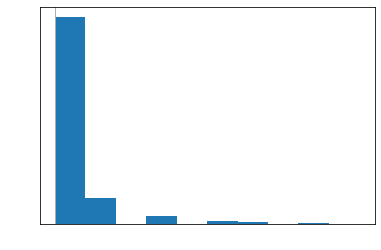

Weight of 20% of area: 0.37
Pareto principal does not work.


In [8]:
import scipy.stats as stats
N = 7
x = np.arange(1, N+1)
a = 3.
weights = x ** (-a)
weights /= weights.sum()
bounded_zipf = stats.rv_discrete(name='bounded_zipf', values=(x, weights))

sample = bounded_zipf.rvs(size=10000)

draw_hist(sample)
test_pareto_principal(sample)

## Task 6

Nodes:  15
Edges:  38


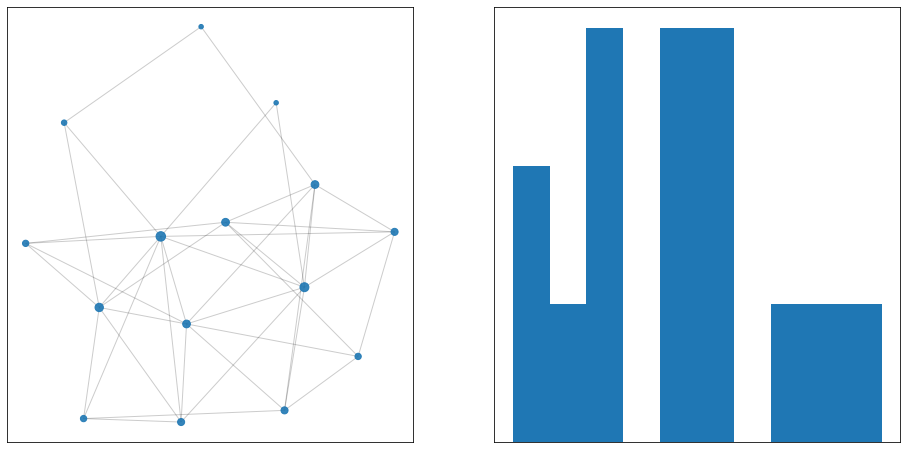

In [9]:
n = 15
p = 0.3

ER = nx.erdos_renyi_graph(n,p, seed=42)
draw_graph_with_degree_histogram(ER)
print('Mean degree: ', np.mean([d for _,d in ER.degree]))
print('Std degree: ', st.stdev([d for _,d in ER.degree]))

In [10]:
m = 6
BA = nx.generators.barabasi_albert_graph(n,m, seed=42)
draw_graph_with_degree_histogram(BA)
print('Mean degree: ', np.mean([d for _,d in BA.degree]))
print('Std degree: ', st.stdev([d for _,d in BA.degree]))

Nodes:  15
Edges:  54
Mean degree:  7.2
Std degree:  2.6240644591385873


## P3.1 - drawing examples

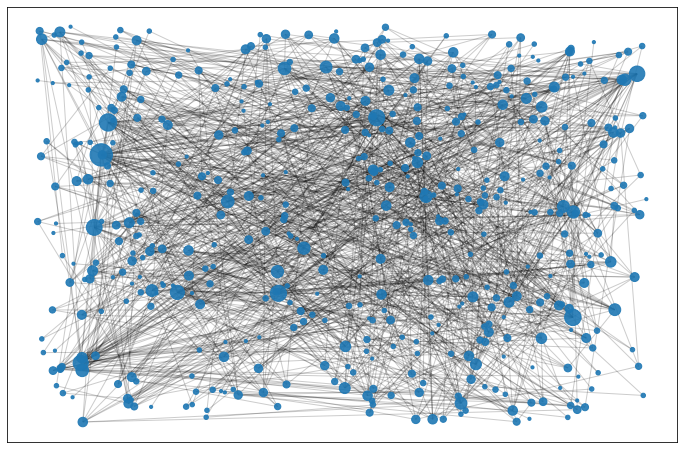

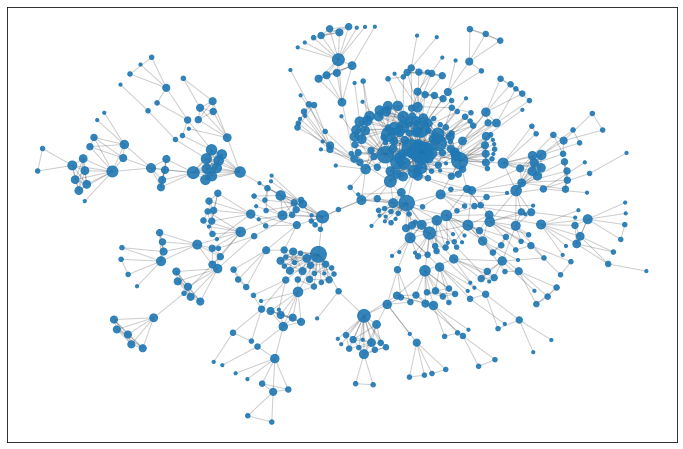

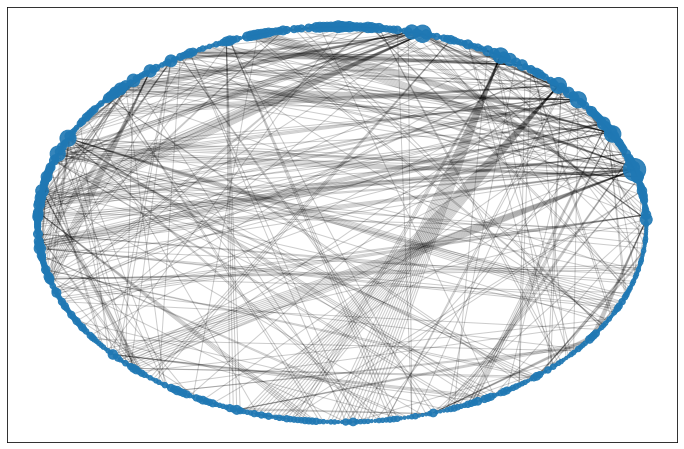

In [13]:
G = read_mtx('../data/bio-diseasome/bio-diseasome.mtx')

pretty_draw(G, nx.random_layout)
pretty_draw(G, nx.kamada_kawai_layout)
pretty_draw(G, nx.circular_layout)
pretty_draw(G, nx.spring_layout)
